In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [290]:
data_in = pd.read_csv('adm_data.csv')
data_in.index = data_in['Serial No.']
data_in.drop('Serial No.', axis = 1, inplace=True)
data_in.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


- 1.Проведите первичный анализ данных
- 2.Проведите визуальный анализ данных
- 3.Разбейте данные на обучение и тест
- 4.Обучите модель регрессии, с целевым признаком Chance of Admit (изменяется от 0 до 1).
- 5.Оцените подходящие метрики качества
- 6.Сформулируйте выводы по проделанной работе

In [291]:
data_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [292]:
data_in.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


1.Проведите первичный анализ данных
 - Данные и 400 записей уникальных абитуриентов
 
Вещественные признаки:
  - GRE Scoreб TOEFL Scoreб, Chance of Admit, CGPA
  
Категориальные признаки:
 - University Rating, SOP, LOR, Research	

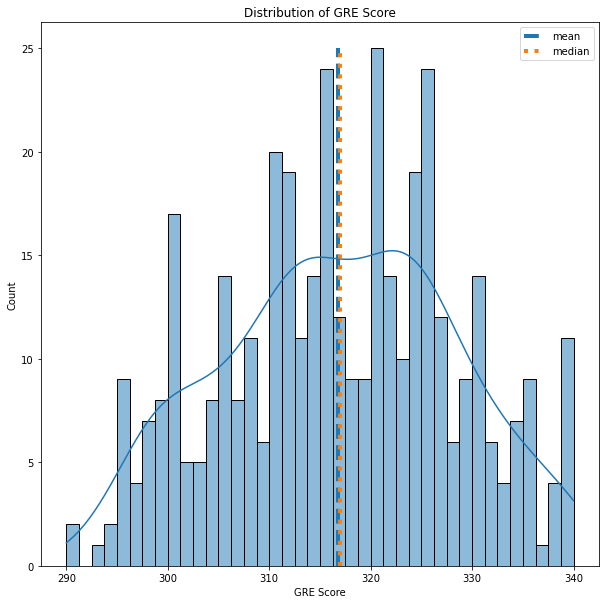

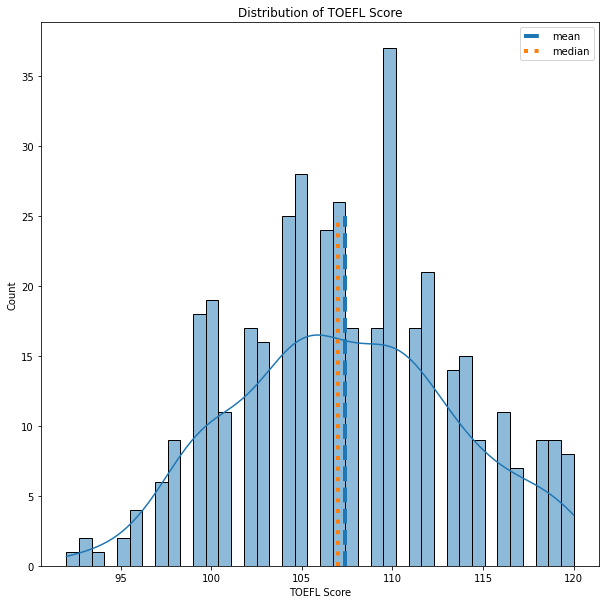

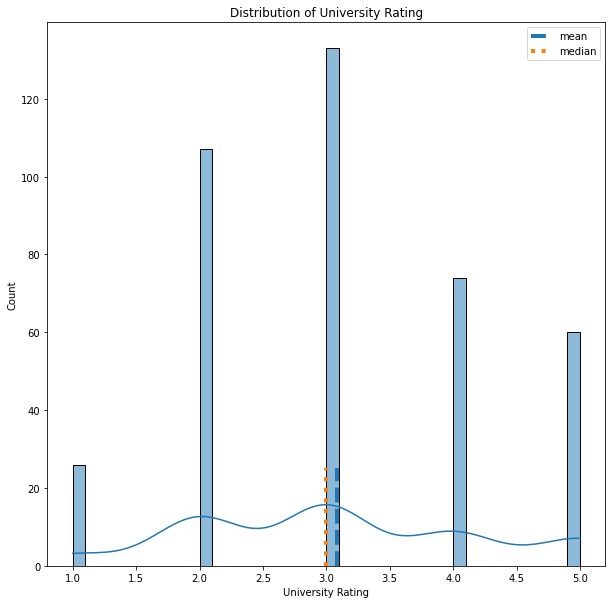

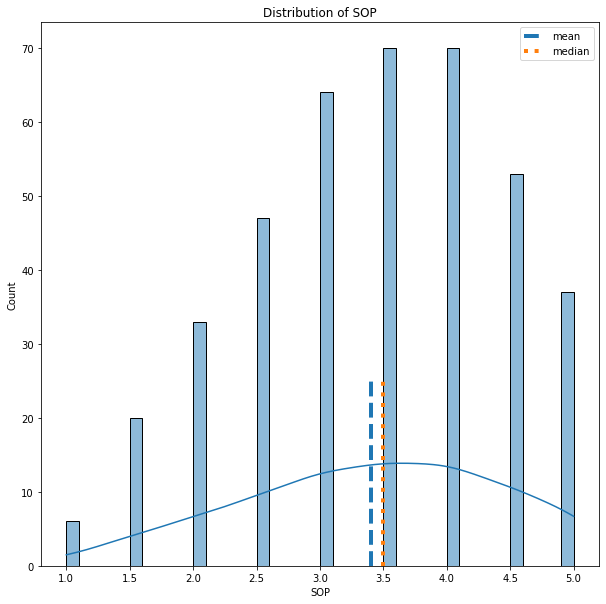

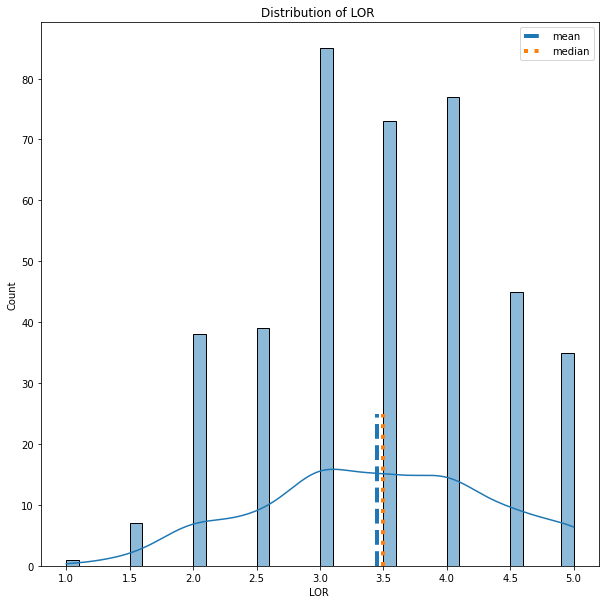

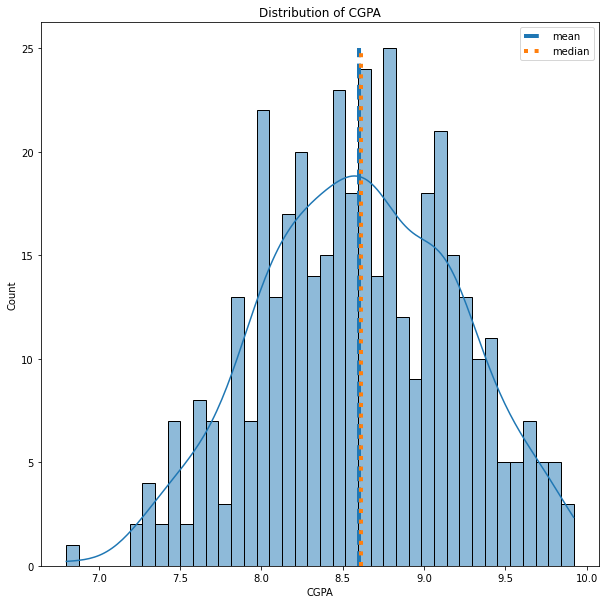

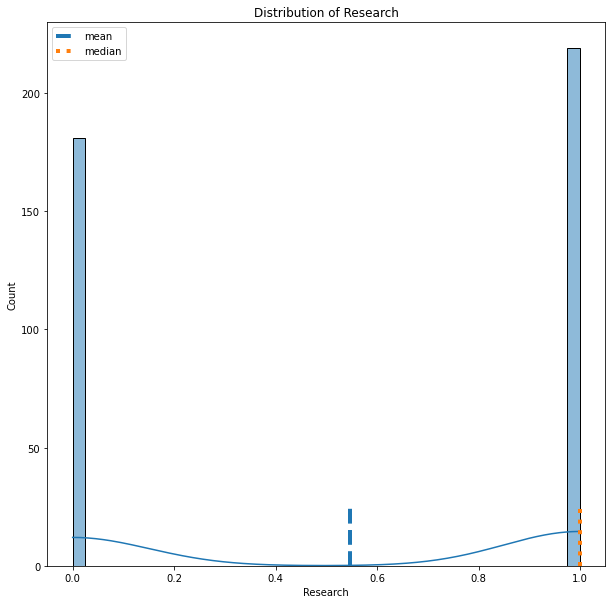

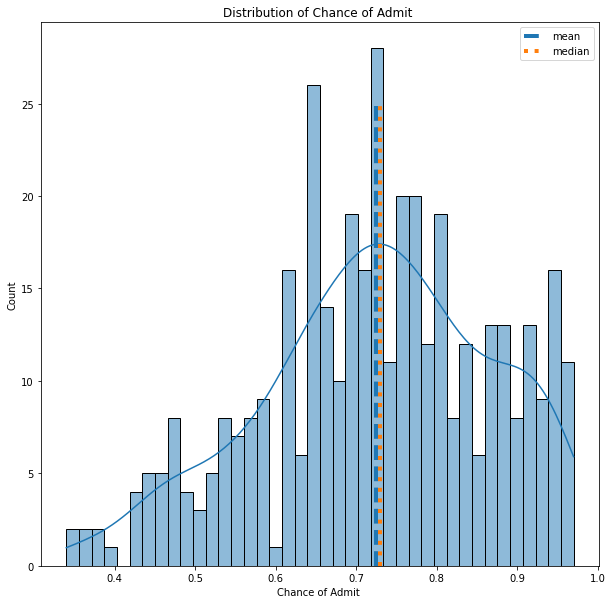

In [293]:
for el in data_in:
    plt.figure(figsize=(10, 10))
    sns.histplot(data_in[el], bins=40, kde=True)
    mean_val = data_in[el].mean()
    meadian_val = data_in[el].median()
    y = (0, 25)
    plt.plot([mean_val]*2, y, label='mean', linestyle='--', linewidth=4)
    plt.plot([meadian_val]*2, y, label='median', linestyle=':', linewidth=4)
    plt.title(f'Distribution of {el}')
    plt.legend()
    plt.show()

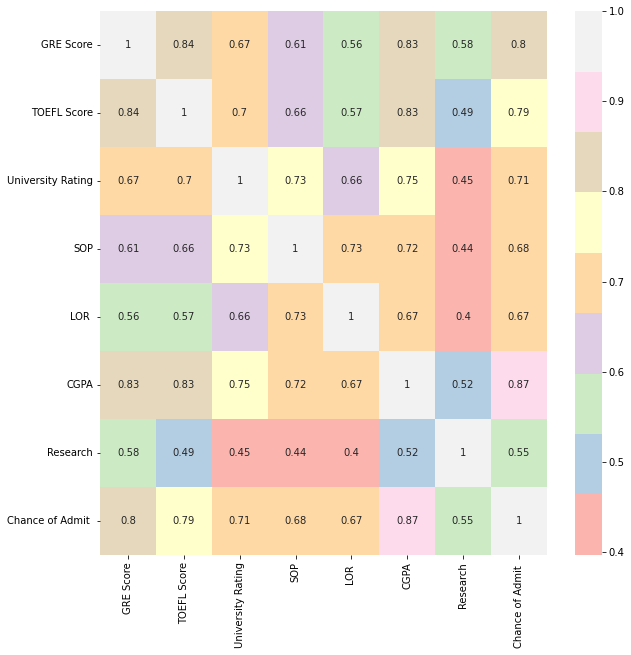

In [294]:
plt.figure(figsize=(10, 10))
cor = data_in.corr()
sns.heatmap(cor, annot=True, cmap='Pastel1')
plt.show()

- Показатели средних значений близки к медианам, можем предполагать отуствие значимых выбросов
- На тепловой карте видим показатели взаимных корреляций метрик, можем сделать вывод, что корреляция показателей выше 0,55

Проведем нормирование и построим распределение целевой метрики от остальных данных

In [295]:
data_in.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [296]:
data_in.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [309]:
data_in1 = data_in.copy()
for el in data_in1.drop('Chance of Admit ', axis=1):

    data_in1[el] = pd.DataFrame(preprocessing.normalize(data_in1[el].values.reshape(-1, 1), axis = 0), index=data_in1.index)

In [310]:
data_in1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,0.053152,0.054842,0.060753,0.063459,0.063074,0.055978,0.067574,0.92
2,0.051102,0.049730,0.060753,0.056408,0.063074,0.051453,0.067574,0.76
3,0.049840,0.048336,0.045565,0.042306,0.049058,0.046406,0.067574,0.72
4,0.050786,0.051124,0.045565,0.049357,0.035041,0.050293,0.067574,0.80
5,0.049525,0.047871,0.030376,0.028204,0.042050,0.047624,0.000000,0.65
...,...,...,...,...,...,...,...,...
396,0.051102,0.051124,0.045565,0.049357,0.049058,0.052439,0.067574,0.82
397,0.051259,0.049730,0.045565,0.042306,0.049058,0.052845,0.067574,0.84
398,0.052048,0.053913,0.060753,0.070510,0.063074,0.054817,0.067574,0.91


In [311]:
from sklearn.model_selection import train_test_split

In [312]:
X_train, X_test, y_train, y_test = train_test_split(data_in1.drop('Chance of Admit ', axis=1), \
                                                    data_in1['Chance of Admit '], \
                                                    test_size=0.25, \
                                                    random_state=42)

In [313]:
from sklearn.linear_model import LinearRegression

In [314]:
model = LinearRegression()

In [315]:
model = model.fit(X_train, y_train)

In [316]:
model.score(X_train, y_train)

0.7958850329341665

In [317]:
model.score(X_test, y_test)

0.8161147779165652

Получили метрику качества модели R2 равную 0,816
Что является очень хорошим показателем качества модели